El umbral óptimo calculado por Otsu es: 82.0


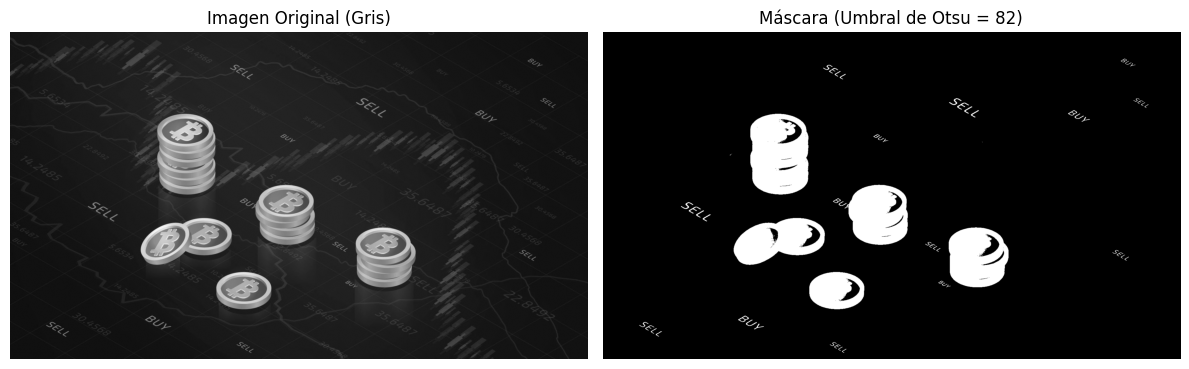

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_gris = cv2.imread('licensed-image.jpg', cv2.IMREAD_GRAYSCALE)

if img_gris is None:
    print("Error: No se pudo cargar la imagen.")

else:

    thresh_value, mask_otsu = cv2.threshold(img_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"El umbral óptimo calculado por Otsu es: {thresh_value}")


    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Imagen Original (Gris)')
    plt.imshow(img_gris, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Máscara (Umbral de Otsu = {thresh_value:.0f})')
    plt.imshow(mask_otsu, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

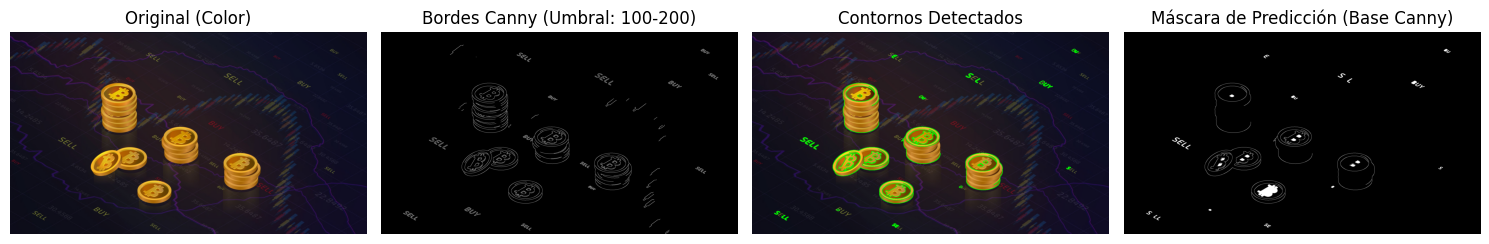

In [29]:
img_color = cv2.imread('licensed-image.jpg')

if img_color is None:
    print("Error: No se pudo cargar la imagen a color.")
else:

    img_gris = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


    edges = cv2.Canny(img_gris, 100, 200)


    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    mask_prediccion = np.zeros_like(img_gris)


    img_contornos = img_color.copy()


    for i, contour in enumerate(contours):

        area = cv2.contourArea(contour)
        if area > 100:
            cv2.drawContours(img_contornos, [contour], -1, (0, 255, 0), 2)


            cv2.drawContours(mask_prediccion, [contour], -1, 255, -1)




    plt.figure(figsize=(15, 6))

    plt.subplot(1, 4, 1)
    plt.title('Original (Color)')
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f'Bordes Canny (Umbral: {100}-{200})')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Contornos Detectados')
    plt.imshow(cv2.cvtColor(img_contornos, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Máscara de Predicción (Base Canny)')
    plt.imshow(mask_prediccion, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()